In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones para la visualización
plt.style.use("fivethirtyeight")
sns.set(rc={'figure.figsize':(12,6)})

## DESCARGA DE DATOS (2019-2022)
### Vamos a comparar varios indicadores antes, durante y después del estallido de la pandemia.

In [3]:
# Elegimos activos representativos
tickers = {
    'S&P 500': '^GSPC',
    'Nasdaq': '^IXIC',
    'Petróleo (Crude Oil)': 'CL=F',
    'Índice de Volatilidad (VIX)': '^VIX'
} 

# Descargamos precios ajustados desde 2019 a 2022 (Pongo Close en lugar de Adj Close por que me tira error sino)
data = yf.download(list(tickers.values()), start='2019-01-01', end='2022-12-31')['Close']

# Renombramos columnas
data.columns = tickers.keys()

# Mostramos las primeras filas
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  4 of 4 completed


,S&P 500,Nasdaq,Petróleo (Crude Oil),Índice de Volatilidad (VIX)
Date,,,,
2019-01-02,46.540001,2510.030029,6665.939941,23.219999
2019-01-03,47.090000,2447.889893,6463.500000,25.450001
2019-01-04,47.959999,2531.939941,6738.859863,21.379999
2019-01-07,48.520000,2549.689941,6823.470215,21.400000
2019-01-08,49.779999,2574.409912,6897.000000,20.469999


## VISUALIZACIÓN GENERAL DE LOS ACTIVOS

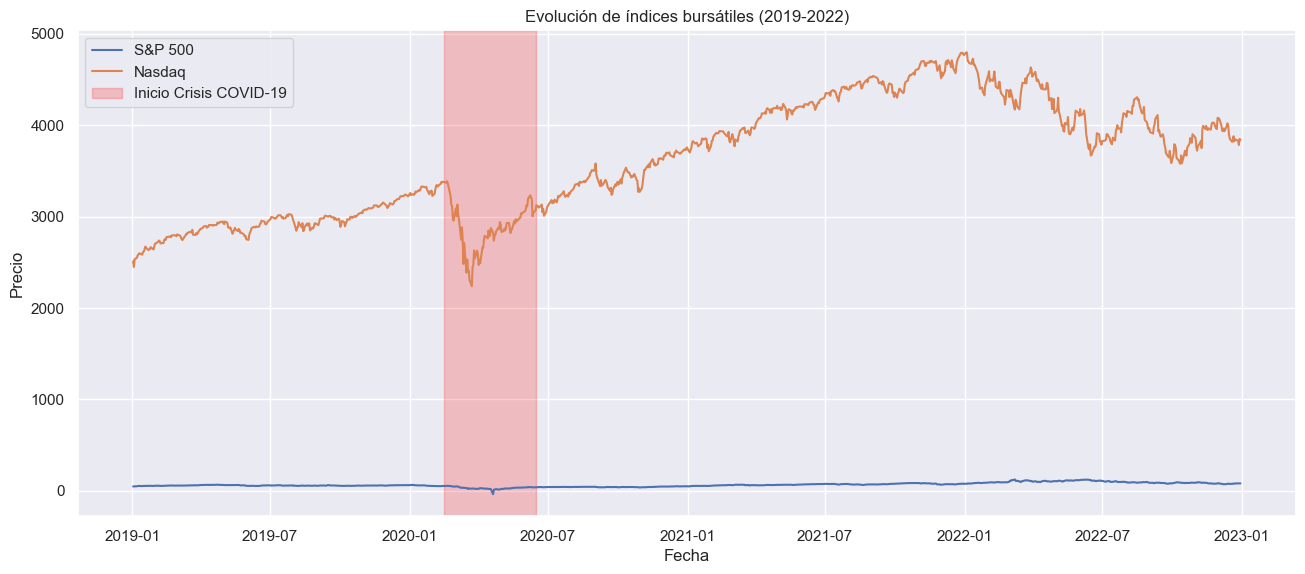

In [5]:
# Visualización de evolución de precios
plt.figure(figsize=(14,6))
for col in ['S&P 500', 'Nasdaq']:
    plt.plot(data[col], label=col)

plt.axvspan("2020-02-15", "2020-06-15", color='red', alpha=0.2, label='Inicio Crisis COVID-19')
plt.title('Evolución de índices bursátiles (2019-2022)')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

#### EXPLICACIÓN: Aquí visualizamos cómo cayeron los principales índices bursátiles en marzo de 2020 (marcado en rojo) y su recuperación posterior

## ANÁLISIS DE VARIACIONES PORCENTUALES

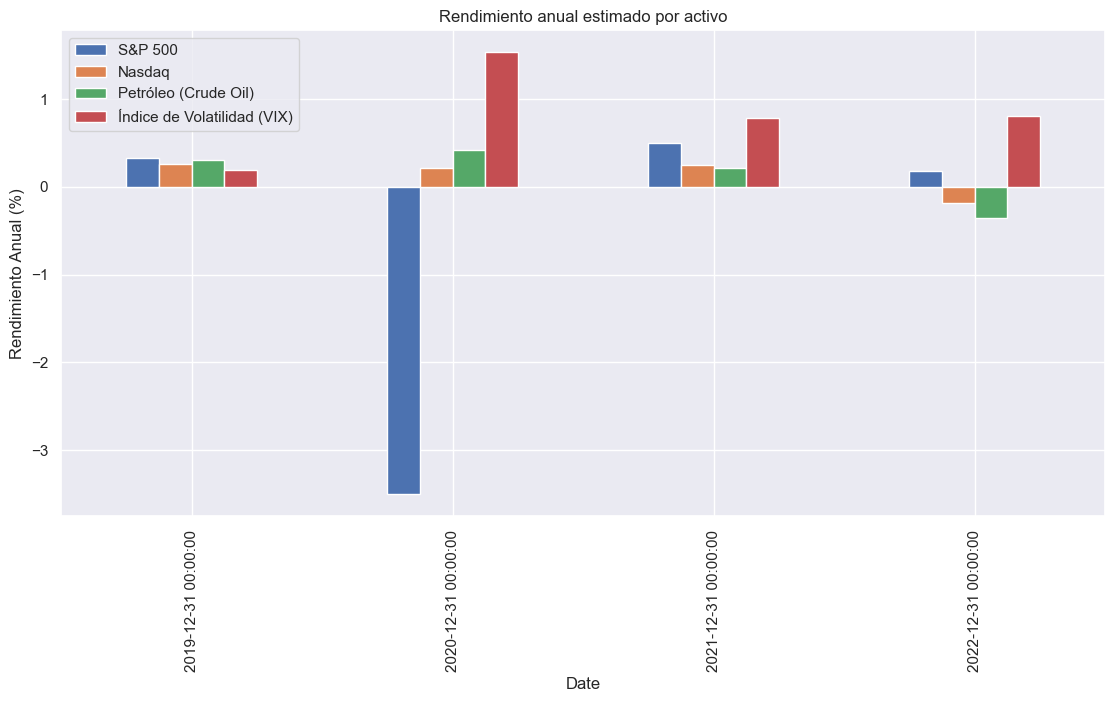

In [8]:
# Retornos porcentuales diarios
returns = data.pct_change().dropna()

# Promedios de retorno por año
anual_returns = returns.resample('YE').mean() * 252 # 252 días bursátiles

anual_returns.plot(kind='bar', title='Rendimiento anual estimado por activo')
plt.ylabel('Rendimiento Anual (%)')
plt.show()

#### EXPLICACIÓN: Aquí observamos si los activos fueron rentables cada año, y cómo se afectaron en 2020.

## CORRELACIONES ENTRE ACTIVOS

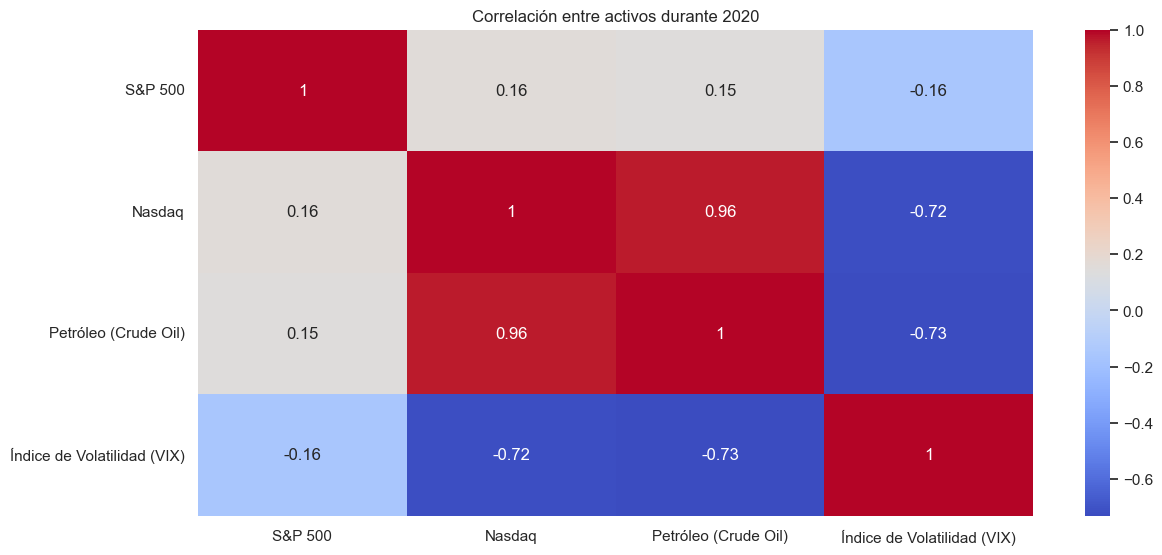

In [11]:
# Calcular correlación durante 2020
returns_2020 = returns.loc['2020']
correlation_matrix = returns_2020.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación entre activos durante 2020")
plt.show()

#### EXPLICACIÓN: Durante las crisis, los activos tienden a moverse más juntos (correlación alta).

## ANÁLISIS DE VOLATILIDAD (ÍNDICE VIX)

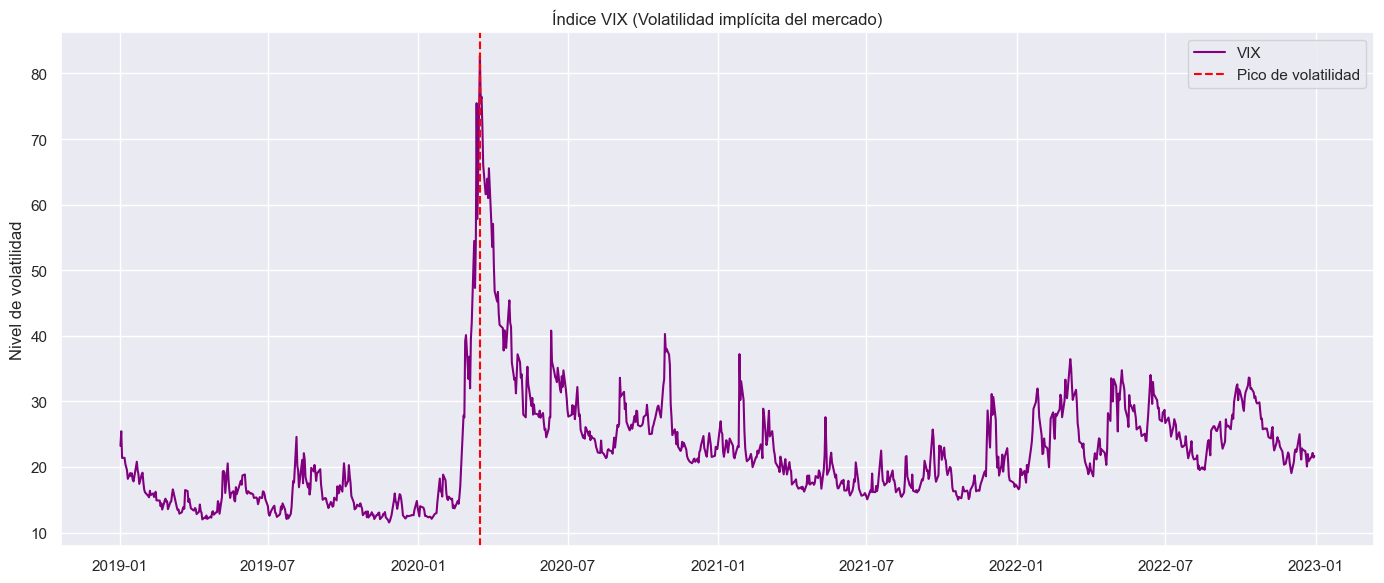

In [14]:
plt.figure(figsize=(14, 6))
plt.plot(data['Índice de Volatilidad (VIX)'], label='VIX', color='purple')
plt.axvline(pd.to_datetime("2020-03-16"), color='red', linestyle='--', label='Pico de volatilidad')
plt.title("Índice VIX (Volatilidad implícita del mercado)")
plt.ylabel("Nivel de volatilidad")
plt.legend()
plt.tight_layout()
plt.show()

#### EXPLICACIÓN: El VIX alcanzó niveles históricamente altos en marxo de 2020, es decir, una señal de miedo extremo en los mercados.

## IMPACTO DEL PETRÓLEO

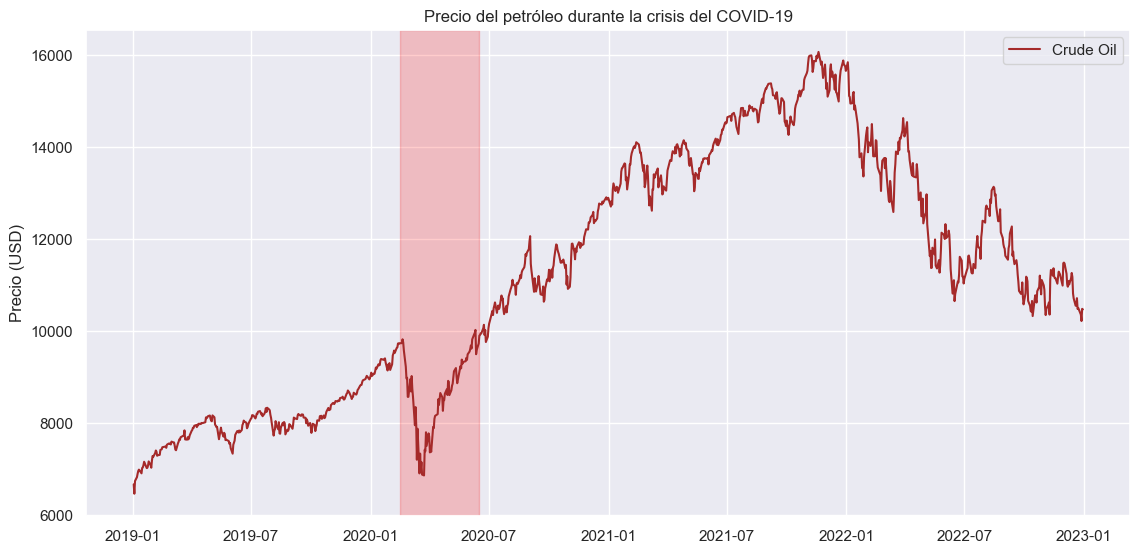

In [17]:
plt.plot(data['Petróleo (Crude Oil)'], label='Crude Oil', color='brown')
plt.axvspan("2020-02-15", "2020-06-15", color='red', alpha=0.2)
plt.title("Precio del petróleo durante la crisis del COVID-19")
plt.ylabel("Precio (USD)")
plt.legend()
plt.show()

#### EXPLICACIÓN: El petróleo incluso llegó a cotizar en negativo brevemente en abril de 2020, por exceso de oferta y caída de demanda

### 📌 Conclusiones del análisis

- En marzo de 2020, el **S&P 500** y **Nasdaq** sufrieron caídas de más del **30%** en pocas semanas.
- El **VIX** alcanzó valores superiores a **80**, niveles no vistos desde la crisis financiera de 2008.
- El precio del **petróleo** colapsó debido a una fuerte caída global en la demanda.
- En los meses siguientes, la **política monetaria expansiva** implementada por bancos centrales permitió una **rápida recuperación** de los mercados financieros.
